## Cleansing Result Data Analysis & Visualisation

#### Data yang digunakan untuk analisis dan visualisasi adalah data hasil proses cleansing kata alay dan kata abusive.
#### Sebagai contoh data yang digunakan adalah "data.csv" yang bersumber dari https://www.kaggle.com/datasets/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text

### Import library

In [1]:
import re
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sqlite3

### Create Connection to gold_challenge Database

In [2]:
connection = sqlite3.connect('gold_challenge.db')

In [3]:
# read cleansing result database
df = pd.read_sql("SELECT * FROM cleansing_result", connection)
df

,raw_text,clean_text,jumlah_kata_abusive
0,- disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt siapa yang telat memberi tau kamu e*** s***...,2
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berpikir kenapa aku tetap percay...,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu s**** tapi dilihat d...,1
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum c***** k**** sudah kelihatan dongoknya da...,2
...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal berbicara ndasmu c***** kamu yang ...,1
13165,USER Kasur mana enak kunyuk',kasur mana enak k*****,1
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati b*** tidak lagi bosan duh,1
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang terkub...,0


### Check Number of Columns and Total Data

In [4]:
print(f"Dataset ini terdiri dari {df.shape[0]} baris dan {df.shape[1]} kolom")

Dataset ini terdiri dari 13169 baris dan 3 kolom


### Check Duplicated Data

In [5]:
# duplicated data
df.duplicated('raw_text').sum()

146

In [6]:
# unique data
df['raw_text'].nunique()

13023

In [7]:
# drop duplicated data
df = df.drop_duplicates()

In [8]:
df.shape

(13023, 3)

### Check Missing Values

In [9]:
df.isna().sum()

raw_text               0
clean_text             0
jumlah_kata_abusive    0
dtype: int64

## Jumlah Kata Dalam Teks

In [10]:
df['num_kata'] = df['clean_text'].str.split().str.len()
df.head()

C:\Users\Irin\AppData\Local\Temp\ipykernel_11004\2734420945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_kata'] = df['clean_text'].str.split().str.len()


,raw_text,clean_text,jumlah_kata_abusive,num_kata
0,- disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...,1,22
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt siapa yang telat memberi tau kamu e*** s***...,2,20
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berpikir kenapa aku tetap percay...,0,39
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu s**** tapi dilihat d...,1,13
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum c***** k**** sudah kelihatan dongoknya da...,2,12


## Jumlah Karakter Dalam Teks

In [11]:
df['num_karakter'] = df['clean_text'].str.len()
df.head()

C:\Users\Irin\AppData\Local\Temp\ipykernel_11004\3641193736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_karakter'] = df['clean_text'].str.len()


,raw_text,clean_text,jumlah_kata_abusive,num_kata,num_karakter
0,- disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...,1,22,133
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt siapa yang telat memberi tau kamu e*** s***...,2,20,108
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berpikir kenapa aku tetap percay...,0,39,251
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu s**** tapi dilihat d...,1,13,62
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum c***** k**** sudah kelihatan dongoknya da...,2,12,76


## Analisis Kata

### EDA: Univariate Analysis

In [19]:
# Total jumlah karakter dari 1 data
total_kata = df['num_kata'].sum()
print(f"Total jumlah kata dari dataset sebanyak: {total_kata:,} kata")

Total jumlah kata dari dataset sebanyak: 225,955 kata


In [13]:
# rata-rata jumlah kata dalam teks di dataset
avg_num_kata = df['num_kata'].mean()
print(f"Rata-rata jumlah kata dalam teks di dataset: {avg_num_kata:.3f} kata")

Rata-rata jumlah kata dalam teks di dataset: 17.350 kata


In [14]:
df['num_kata'].value_counts().sort_index()

0       7
1      39
2     239
3     393
4     479
5     499
6     535
7     553
8     506
9     510
10    539
11    559
12    533
13    442
14    457
15    462
16    423
17    441
18    404
19    405
20    394
21    337
22    323
23    256
24    240
25    223
26    188
27    186
28    138
29    161
30    148
31    163
32    154
33    145
34    150
35    177
36    146
37    129
38    151
39    136
40    104
41     99
42    103
43     71
44     64
45     48
46     29
47     31
48     39
49     17
50     12
51     11
52      8
53      5
54      6
55      1
56      1
57      2
61      1
65      1
Name: num_kata, dtype: int64

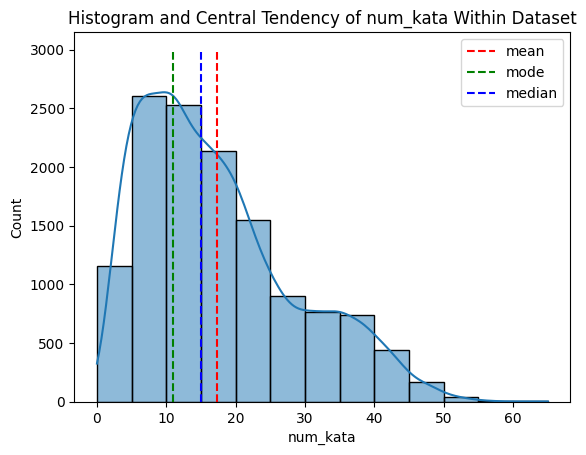

In [15]:
# Memplot histogram jumlah kata pada teks
sns.histplot(data=df, x='num_kata', binwidth=5, kde=True)
plt.vlines(df['num_kata'].mean(), 0, 3000, label='mean', linestyle='dashed', color='red')
plt.vlines(df['num_kata'].mode(), 0, 3000, label='mode', linestyle='dashed', color='green')
plt.vlines(df['num_kata'].median(), 0, 3000, label='median', linestyle='dashed', color='blue')
plt.title("Histogram and Central Tendency of num_kata Within Dataset")
plt.legend()
plt.show()

### Mengidentifikasi outlier pada data

In [16]:
# Nilai minimum
p0 = df['num_kata'].min()
# Nilai maksimum
p100 = df['num_kata'].max()
# Quartile 1
q1 = df['num_kata'].quantile(0.25)
# Quartile 2
q2 = df['num_kata'].quantile(0.5)
# Quartile 3
q3 = df['num_kata'].quantile(0.75)
# Menghitung IQR
iqr = q3 - q1
# Batas bawah
lower_limit = q1 - 1.5*iqr
# Batas atas
upper_limit = q3 + 1.5*iqr

print("batas bawah 'num_kata':", lower_limit)
print("nilai minimum:", p0)
if lower_limit < p0:
    print("Tidak ada outlier dari sisi batas bawah")
else:
    print("Ada outlier dari sisi batas bawah")
    
print("batas atas 'num_kata':", upper_limit)
print("nilai maksimum:", p100)
if lower_limit > p100:
    print("Tidak ada outlier dari sisi batas bawah")
else:
    print("Ada outlier dari sisi batas atas")

batas bawah 'num_kata': -13.5
nilai minimum: 0
Tidak ada outlier dari sisi batas bawah
batas atas 'num_kata': 46.5
nilai maksimum: 65
Ada outlier dari sisi batas atas


### Mencari common words

In [17]:
from collections import Counter
df['temp_list'] = df['clean_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

C:\Users\Irin\AppData\Local\Temp\ipykernel_11004\3854498708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp_list'] = df['clean_text'].apply(lambda x:str(x).split())


,Common_words,count
0,yang,4997
1,dan,3549
2,tidak,3197
3,di,3166
4,itu,2136
5,kamu,1812
6,indonesia,1671
7,ini,1610
8,presiden,1490
9,ada,1431


## Analisis Karakter

In [22]:
# Total jumlah karakter dari 1 data
total_karakter = df['num_karakter'].sum()
print(f"Total jumlah karakter dari dataset sebanyak: {total_karakter:,} karakter")

Total jumlah karakter dari dataset sebanyak: 1,437,426 karakter


In [23]:
# rata-rata jumlah kata dalam teks di dataset
avg_num_karakter = df['num_karakter'].mean()
print(f"Rata-rata jumlah karakter dalam teks di dataset: {avg_num_karakter:.3f} karakter")

Rata-rata jumlah karakter dalam teks di dataset: 110.376 karakter


### EDA: Bivariate Analysis
### Mencari korelasi antara jumlah karakter dan jumlah kata

Text(0.5, 1.0, 'Korelasi Jumlah Karakter Dengan Jumlah Kata')

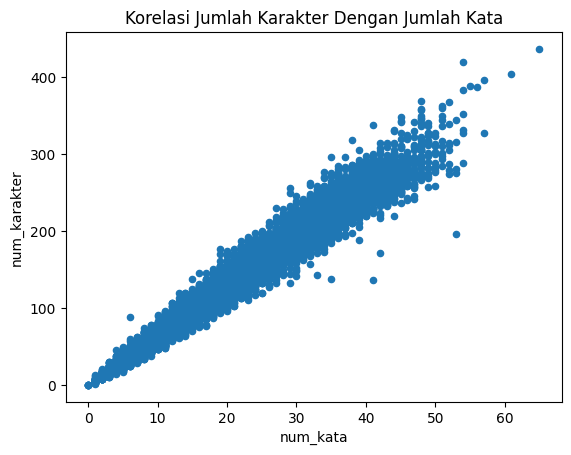

In [25]:
df.plot(x='num_kata', y='num_karakter', kind = 'scatter')
plt.title("Korelasi Jumlah Karakter Dengan Jumlah Kata")

## Analisis Kata Abusive Dalam Teks

### Jumlah kata abusive dalam teks

In [41]:
# Total jumlah kata abusive dari 1 data
total_kata_abusive = df['jumlah_kata_abusive'].sum()
print(f"Total jumlah kata abusive dari dataset sebanyak: {total_kata_abusive:,} kata")

Total jumlah kata abusive dari dataset sebanyak: 8,769 kata


In [42]:
# rata-rata jumlah kata dalam teks di dataset
avg_num_abusive = df['jumlah_kata_abusive'].mean()
print(f"Rata-rata jumlah kata abusive dalam teks di dataset: {avg_num_abusive:.3f} kata")

Rata-rata jumlah kata abusive dalam teks di dataset: 0.673 kata


In [50]:
df['jumlah_kata_abusive'].value_counts()

0     6431
1     5047
2     1118
3      299
4       87
5       23
6       11
7        3
8        3
15       1
Name: jumlah_kata_abusive, dtype: int64

Text(0, 0.5, 'Count')

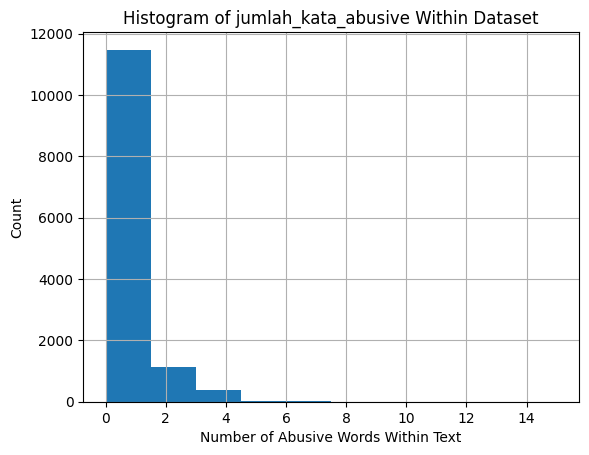

In [55]:
df['jumlah_kata_abusive'].hist()
plt.title("Histogram of jumlah_kata_abusive Within Dataset")
plt.xlabel('Number of Abusive Words Within Text')
plt.ylabel('Count')

### Analisis Kata Abusive yang Paling Sering Muncul

In [27]:
# read cleansing result database
df_abusive = pd.read_sql("SELECT * FROM abusive_occurence", connection)
df_abusive

,abusive_occurence
0,bego
1,edan
2,sarap
3,sipit
4,cebong
...,...
8853,bodoh
8854,congor
8855,kunyuk
8856,bisu


In [38]:
#df_abusive_count = df_abusive['abusive_occurence'].value_counts().rename_axis('kata_abusive').reset_index(name='counts')
df_abusive['temp_list'] = df_abusive['abusive_occurence']
top = Counter([item for item in df_abusive['temp_list']])
temp_abusive = pd.DataFrame(top.most_common(20))
temp_abusive.columns = ['Common_words','count']
temp_abusive.style.background_gradient(cmap='Blues')

,Common_words,count
0,cebong,518
1,asing,427
2,komunis,357
3,rezim,357
4,kafir,302
5,antek,264
6,onta,230
7,babi,209
8,kampret,195
9,sipit,177
